In [53]:
# import des librairies dont nous aurons besoin
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import my_functions
from matplotlib.cbook import boxplot_stats
from scipy import stats
from scipy.stats import shapiro 
from scipy.stats import kstest
import statsmodels.api as sm
from statsmodels.formula.api import ols



In [54]:
# chargement et affichage des données
data = pd.read_csv('../data.csv')
print(data)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [55]:
print(data.shape)

(1338, 7)


# Détectez les erreurs
#### les valeurs manquantes 

In [56]:
print(data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


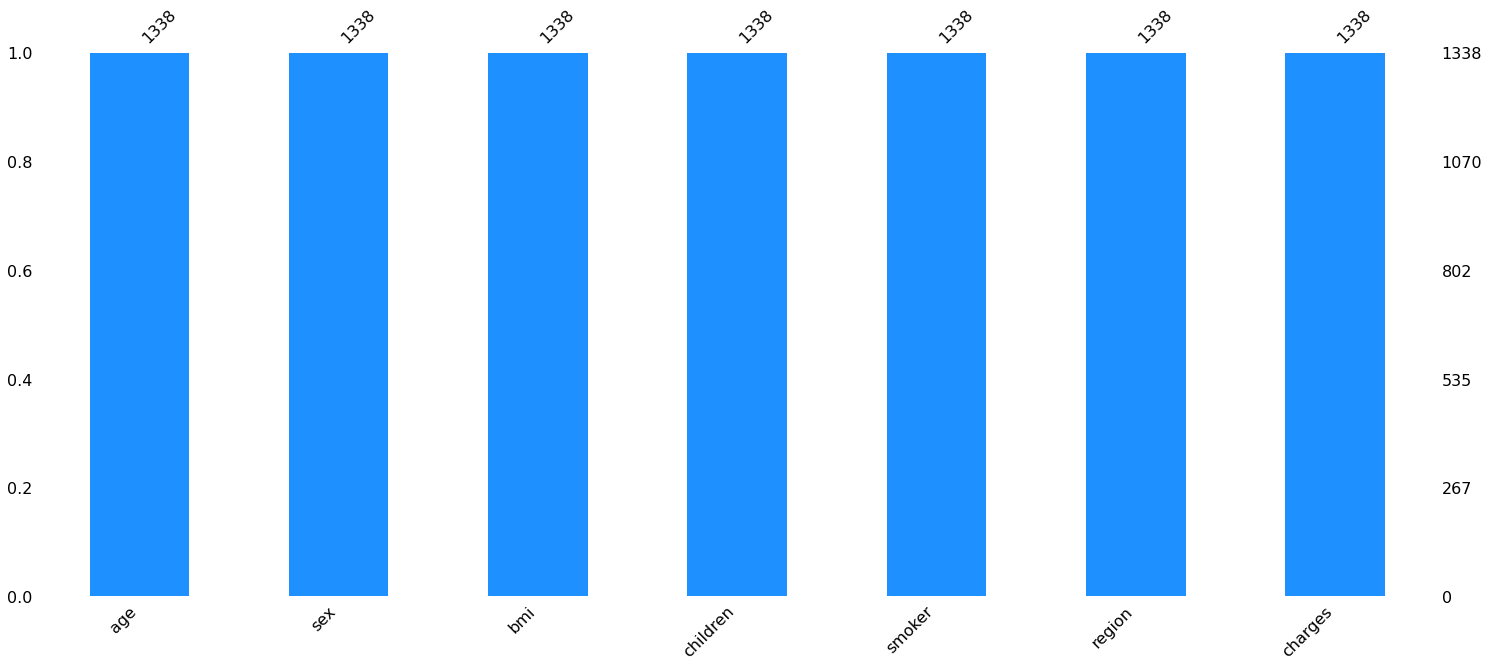

In [57]:
msno.bar(data,  color="dodgerblue");

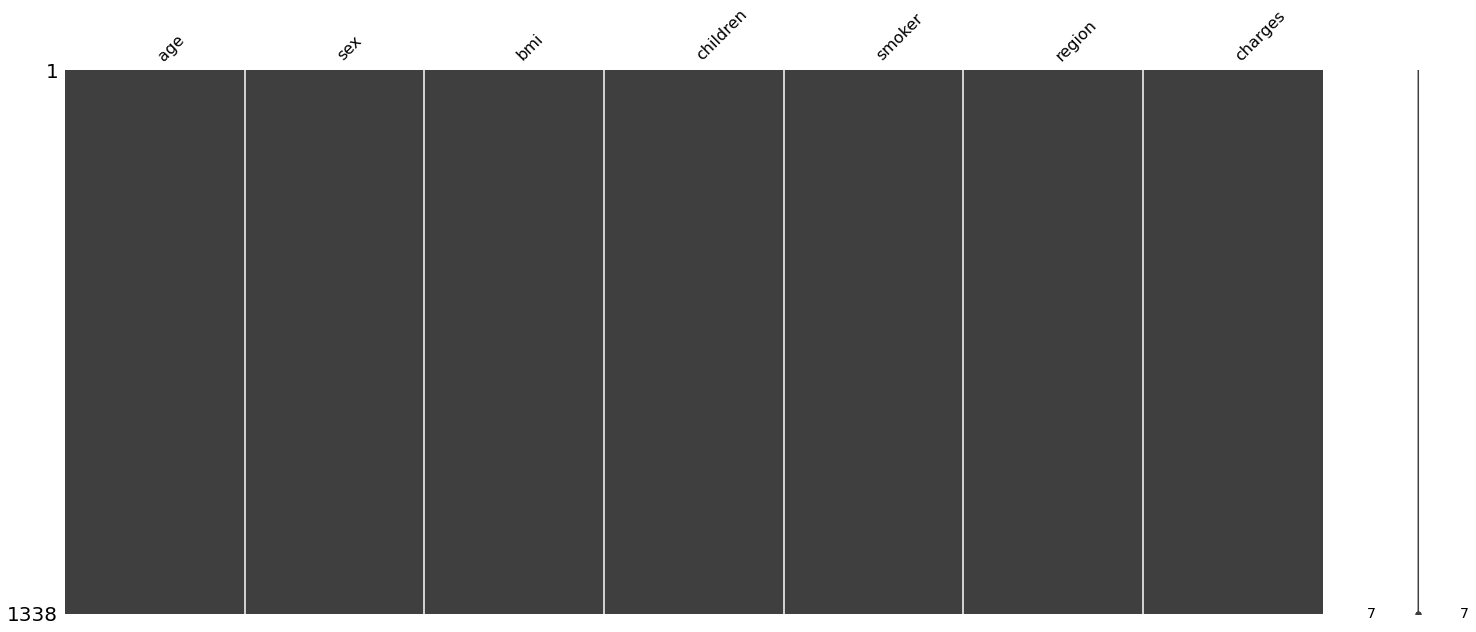

In [58]:
msno.matrix(data);

In [59]:
# data.isnul().any()

#### les doublons 

In [60]:
s = data.duplicated()
data = data.assign(duplicated=s)
def classify_bmi(row):
    if row["bmi"] < 25:
        return "normal"
    elif row["bmi"] < 30:
        return "overweight"
    else:
        return "obese"

data["bmi_class"] = data.apply(classify_bmi, axis=1)
data

,age,sex,bmi,children,smoker,region,charges,duplicated,bmi_class
0,19,female,27.900,0,yes,southwest,16884.92400,False,overweight
1,18,male,33.770,1,no,southeast,1725.55230,False,obese
2,28,male,33.000,3,no,southeast,4449.46200,False,obese
3,33,male,22.705,0,no,northwest,21984.47061,False,normal
4,32,male,28.880,0,no,northwest,3866.85520,False,overweight
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,False,obese
1334,18,female,31.920,0,no,northeast,2205.98080,False,obese
1335,18,female,36.850,0,no,southeast,1629.83350,False,obese
1336,21,female,25.800,0,no,southwest,2007.94500,False,overweight


In [61]:
data['duplicated'].unique()

array([False,  True])

In [62]:
duplicate_rows = data[data["duplicated"] == True]
print(duplicate_rows)

     age   sex    bmi  children smoker     region    charges  duplicated  \
581   19  male  30.59         0     no  northwest  1639.5631        True   

    bmi_class  
581     obese  


In [63]:
data.loc[data['charges'].duplicated(keep=False),:]

,age,sex,bmi,children,smoker,region,charges,duplicated,bmi_class
195,19,male,30.59,0,no,northwest,1639.5631,False,obese
581,19,male,30.59,0,no,northwest,1639.5631,True,obese


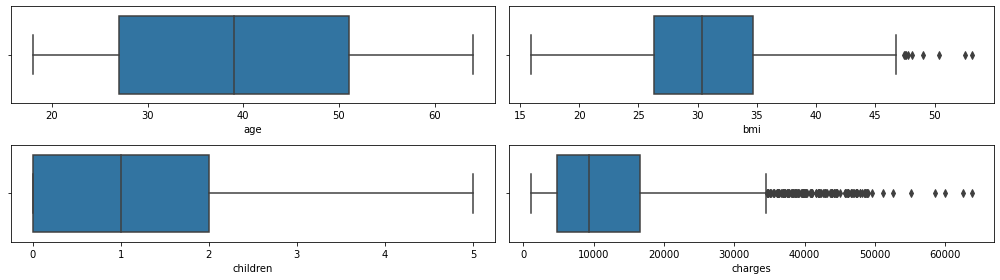

Variable age has no outliers
Variable bmi has 9 outliers
Variable children has no outliers
Variable charges has 139 outliers
--------------------------------------------------
Outilers in variable bmi : [49.06, 48.07, 47.52, 47.41, 50.38, 47.6, 52.58, 47.74, 53.13]


In [64]:
my_functions.boxplot_all_numeric_columns(data)
my_functions.get_outliers_length(data)
print("-"*50)

print(f"Outilers in variable bmi : {my_functions.get_outliers_by_column(data['bmi'])}")

# Analyse univariée de chaque variable. Si les distributions ne sont pas normales, appliquer une transformation logarithmique.

<AxesSubplot:xlabel='sex', ylabel='count'>

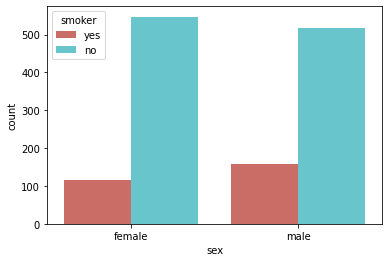

In [65]:
sns.countplot(x='sex', data = data, hue = 'smoker', palette= 'hls')

<AxesSubplot:xlabel='sex', ylabel='charges'>

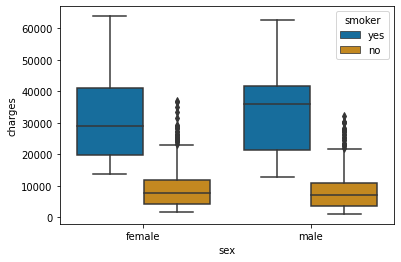

In [66]:
sns.boxplot(x='sex', y= 'charges', data = data, hue = 'smoker',
                     palette= 'colorblind')

/tmp/ipykernel_38193/2655273850.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='sex', y= 'charges', data = data,


<AxesSubplot:xlabel='sex', ylabel='charges'>

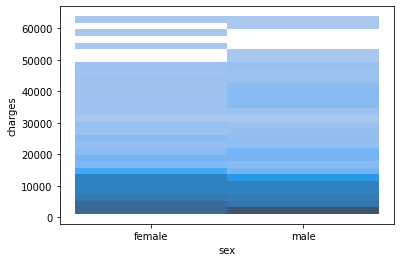

In [67]:
sns.histplot(x='sex', y= 'charges', data = data,
                     palette= 'colorblind')

<AxesSubplot:xlabel='charges', ylabel='sex'>

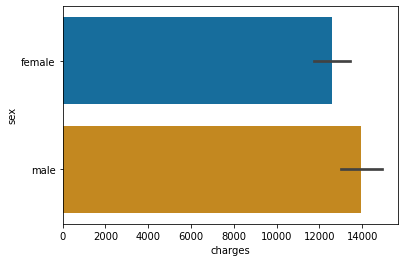

In [68]:
sns.barplot(y='sex', x= 'charges', data = data,
                     palette= 'colorblind')

<AxesSubplot:xlabel='sex', ylabel='charges'>

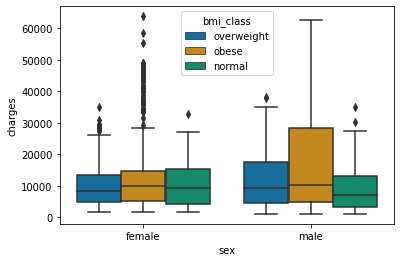

In [69]:
sns.boxplot(x='sex', y= 'charges', data = data, hue = 'bmi_class',
                     palette= 'colorblind')

<AxesSubplot:xlabel='region', ylabel='charges'>

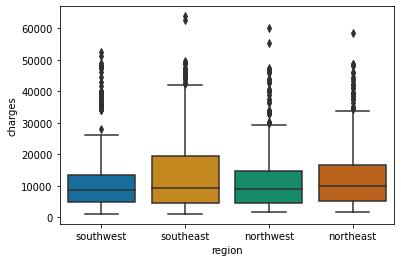

In [70]:
sns.boxplot(x='region', y= 'charges', data = data,
                     palette= 'colorblind')

<AxesSubplot:xlabel='region', ylabel='charges'>

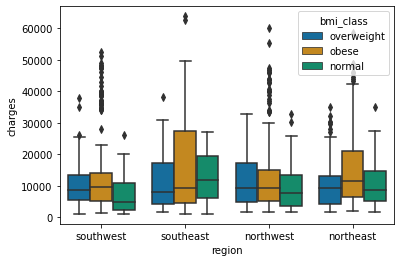

In [71]:
sns.boxplot(x='region', y= 'charges', data = data, hue = 'bmi_class',
                     palette= 'colorblind')

<AxesSubplot:xlabel='charges', ylabel='Count'>

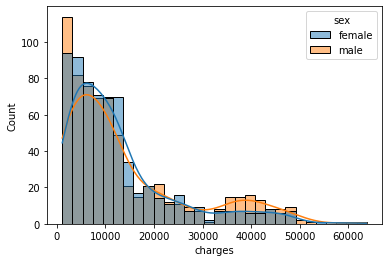

In [72]:
sns.histplot(x = 'charges', data = data, hue = 'sex', kde = True)


In [73]:
# fig, ax = plt.subplots(1,2,figsize=(10,7))
# plt.sca(ax[0])
# sns.histplot(x= 'charges', data = data[data['smoker']=='No'],
#                          bins = 25, color = 'red')
# plt.title("Smoker = No")

# plt.sca(ax[1])
# sns.histplot(x= 'charges', data = data[data['smoker']=='Yes'], bins = 25)
# plt.title("Smoker = Yes")


<AxesSubplot:xlabel='age', ylabel='charges'>

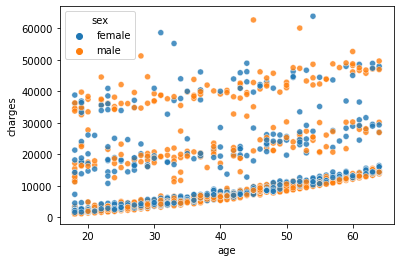

In [74]:
sns.scatterplot(x='age', y='charges', data = data,
                            alpha= 0.8, color = 'blue', hue = 'sex')

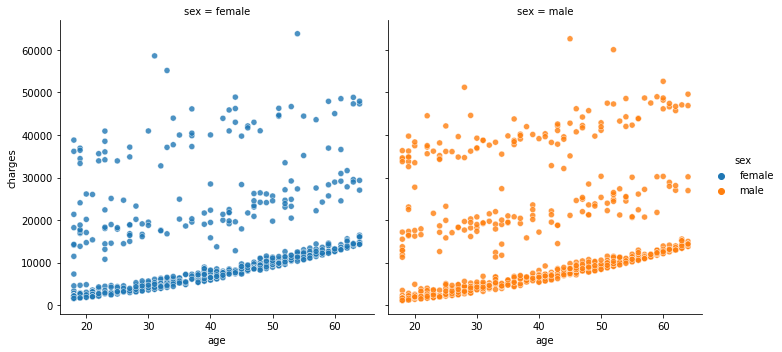

In [75]:
sns.relplot(x='age', y='charges', data = data,
            alpha= 0.8, color = 'blue', hue = 'sex',
                                kind = 'scatter', col = 'sex')

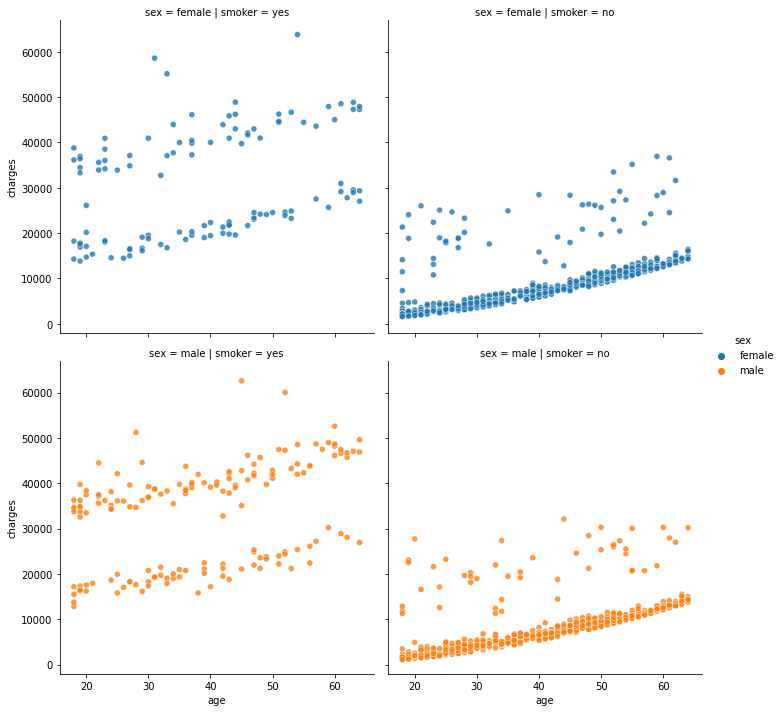

In [76]:
sns.relplot(x='age', y='charges', data = data,
            alpha= 0.8, color = 'blue', hue = 'sex',
                                kind = 'scatter', row = 'sex', col = 'smoker')

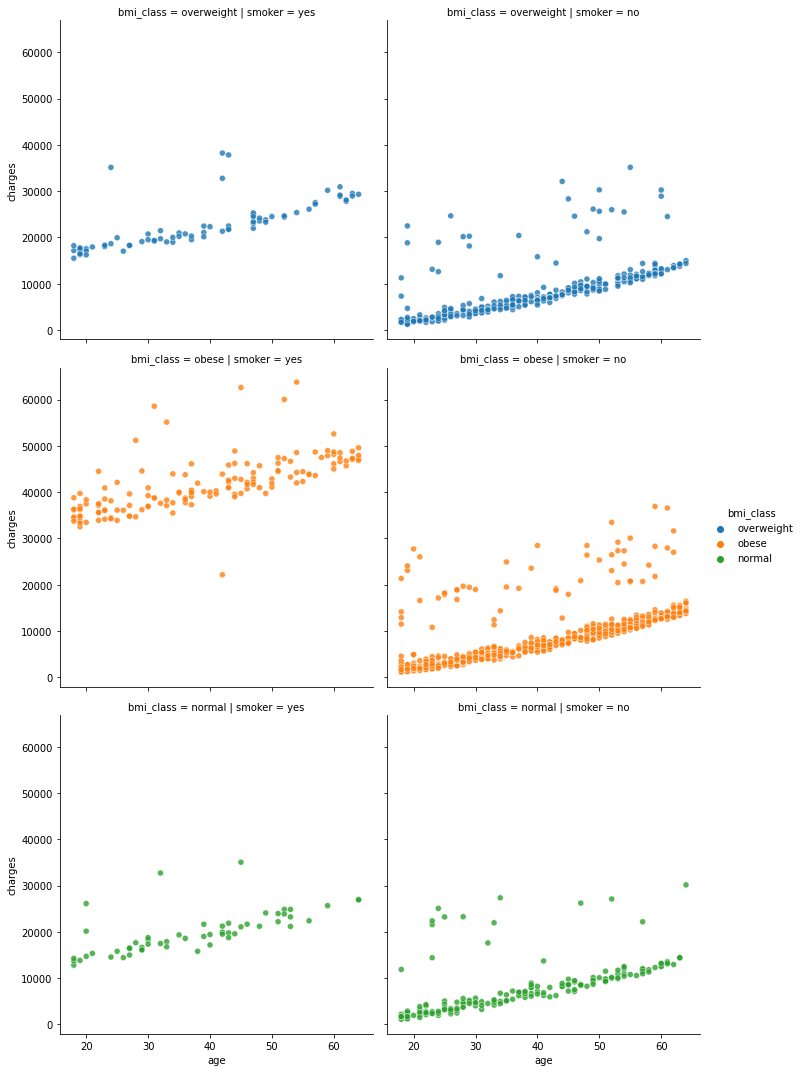

In [77]:
sns.relplot(x='age', y='charges', data = data,
            alpha= 0.8, color = 'blue', hue = 'bmi_class',
                                kind = 'scatter', row = 'bmi_class', col = 'smoker')

# Analyse univariée de chaque variable. Si les distributions ne sont pas normales, appliquer une transformation logarithmique.

In [78]:
def describe(df, stats):
    d = df.describe()
    return pd.concat([d, df.reindex(columns=d.columns).agg(stats)])

describe(data, ['mad','skew', 'kurt'])

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010
mad,12.248931,4.897871,0.985405,9091.126581
skew,0.055673,0.284047,0.938380,1.515880


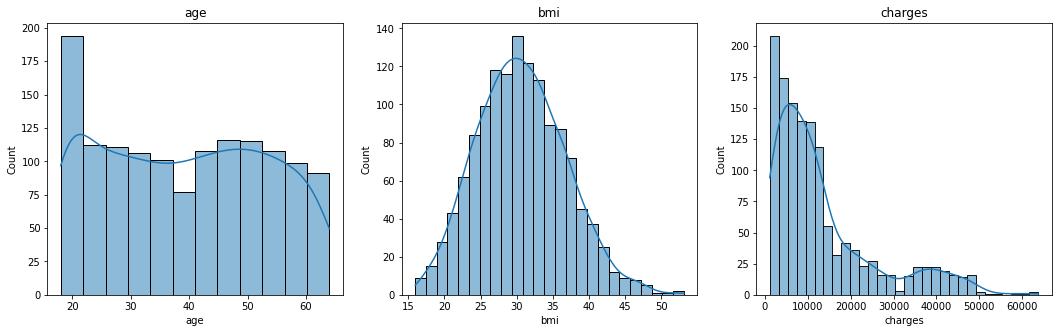

In [79]:


numeric_data = data[['age', 'bmi', 'charges']]

# Create a figure and a set of subplots
ncols = len(numeric_data.columns)

fig, ax = plt.subplots(nrows=1, ncols=ncols, figsize=(18, 5))

# Iterate over the columns of the DataFrame
for i, col in enumerate(numeric_data.columns):
    # Create a distribution plot and a histogram on each subplot
    sns.histplot(data=data, x=col, ax=ax[i], kde=True)
    ax[i].set_title(col)

plt.show()


############################# ORIGINAL DATA #############################
Agostino and Pearson's test
NormaltestResult(statistic=336.8851220567733, pvalue=7.019807901276197e-74)
Shapiro-Wilk test
ShapiroResult(statistic=0.814687967300415, pvalue=1.150477698013898e-36)
Kolmogorov-Smirnov test
KstestResult(statistic=1.0, pvalue=0.0)
**************************************************
#############################LOG TRANSFORMATION #############################
Agostino and Pearson's test
NormaltestResult(statistic=52.71670509113935, pvalue=3.5703676381337117e-12)
Shapiro-Wilk test
ShapiroResult(statistic=0.9831657409667969, pvalue=2.2936005525386882e-11)
Kolmogorov-Smirnov test
KstestResult(statistic=0.9999999999989123, pvalue=0.0)
**************************************************
############################# SQUARE ROOT TRANSFORMATION #############################
NormaltestResult(statistic=112.4605295472106, pvalue=3.7975744156203163e-25)
Shapiro-Wilk test
ShapiroResult(statistic=0.93

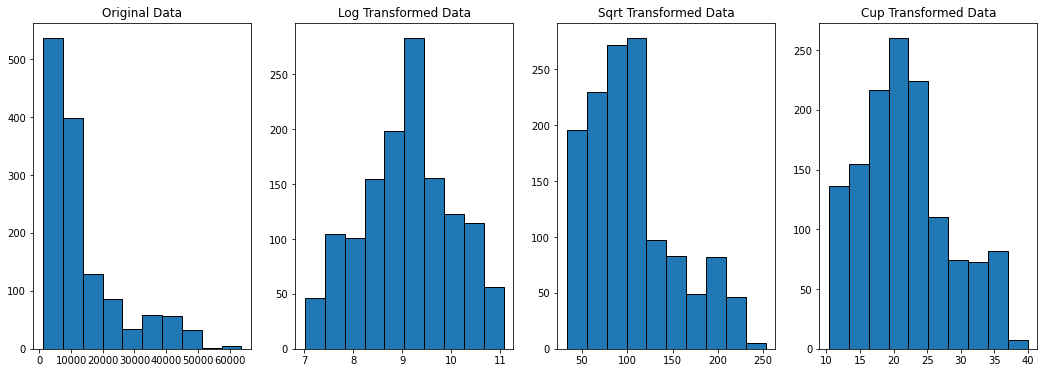

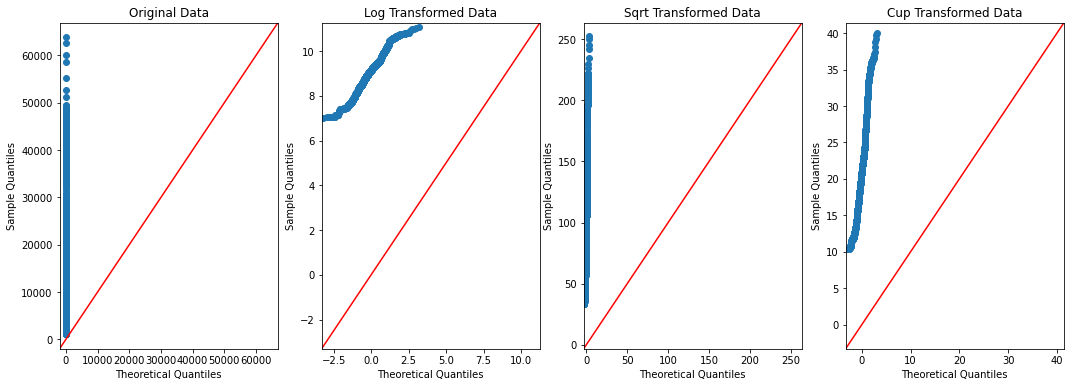

In [80]:

def normalize(column):
    print('############################# ORIGINAL DATA #############################')
    print("Agostino and Pearson's test")
    print(stats.normaltest(column))
    print("Shapiro-Wilk test")
    print(shapiro(column))
    print("Kolmogorov-Smirnov test")
    print(kstest(column, 'norm'))
    print('*'*50)

    print('#############################LOG TRANSFORMATION #############################')
    print("Agostino and Pearson's test")
    print(stats.normaltest(np.log(column)))
    print("Shapiro-Wilk test")
    print(shapiro(np.log(column)))
    print("Kolmogorov-Smirnov test")
    print(kstest(np.log(column), 'norm'))
    print('*'*50)


    print('############################# SQUARE ROOT TRANSFORMATION #############################')
    print(stats.normaltest(np.sqrt(column)))
    print("Shapiro-Wilk test")
    print(shapiro(np.sqrt(column)))
    print("Kolmogorov-Smirnov test")
    print(kstest(np.sqrt(column), 'norm'))
    print('*'*50)

    print('############################# CUBE  ROOT TRANSFORMATION #############################')
    print(stats.normaltest(np.cbrt(column)))
    print("Shapiro-Wilk test")
    print(shapiro(np.cbrt(column)))
    print("Kolmogorov-Smirnov test")
    print(kstest(np.cbrt(column), 'norm'))
    print('*'*50)

    fig, axs = plt.subplots(nrows=1, ncols=4, figsize = (18,6))
    #add title to each histogram
    axs[0].set_title('Original Data')
    axs[1].set_title('Log Transformed Data')
    axs[2].set_title('Sqrt Transformed Data')
    axs[3].set_title('Cup Transformed Data')
    #create histograms
    axs[0].hist(column, edgecolor='black')
    axs[1].hist(np.log(column), edgecolor='black')
    axs[2].hist(np.sqrt(column), edgecolor='black')
    axs[3].hist(np.cbrt(column), edgecolor='black')


    fig, axs = plt.subplots(nrows=1, ncols=4, figsize = (18,6))
    # Create a QQ plot on the first subplot
    sm.qqplot(column, line='45', ax=axs[0])
    sm.qqplot(np.log(column), line='45', ax=axs[1])
    sm.qqplot(np.sqrt(column), line='45', ax=axs[2])
    sm.qqplot(np.cbrt(column), line='45', ax=axs[3])

        #add title to each histogram
    axs[0].set_title('Original Data')
    axs[1].set_title('Log Transformed Data')
    axs[2].set_title('Sqrt Transformed Data')
    axs[3].set_title('Cup Transformed Data')

normalize(data['charges'])


############################# ORIGINAL DATA #############################
Agostino and Pearson's test
NormaltestResult(statistic=1557.8205812363667, pvalue=0.0)
Shapiro-Wilk test
ShapiroResult(statistic=0.9446991682052612, pvalue=5.687479624670986e-22)
Kolmogorov-Smirnov test
KstestResult(statistic=1.0, pvalue=0.0)
**************************************************
#############################LOG TRANSFORMATION #############################
Agostino and Pearson's test
NormaltestResult(statistic=593.2823849198563, pvalue=1.4803588673227106e-129)
Shapiro-Wilk test
ShapiroResult(statistic=0.9303379058837891, pvalue=1.7983989433599073e-24)
Kolmogorov-Smirnov test
KstestResult(statistic=0.9980760675452758, pvalue=0.0)
**************************************************
############################# SQUARE ROOT TRANSFORMATION #############################
NormaltestResult(statistic=1349.018679473835, pvalue=1.159620168254657e-293)
Shapiro-Wilk test
ShapiroResult(statistic=0.9424090385437012,

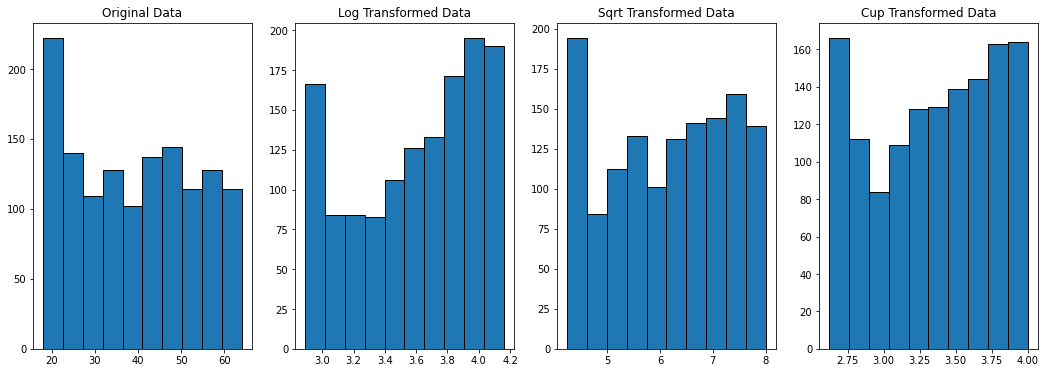

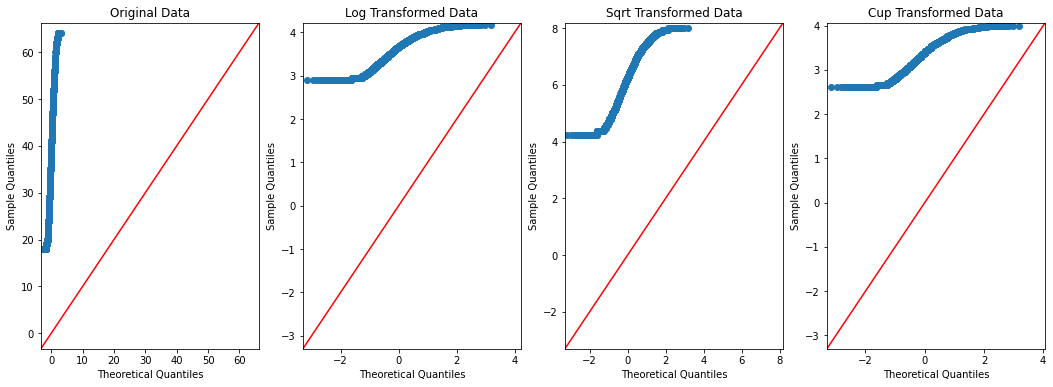

In [81]:
normalize(data['age'])

############################# ORIGINAL DATA #############################
Agostino and Pearson's test
NormaltestResult(statistic=17.581447872784118, pvalue=0.0001521377897266011)
Shapiro-Wilk test
ShapiroResult(statistic=0.9938876032829285, pvalue=2.609841976664029e-05)
Kolmogorov-Smirnov test
KstestResult(statistic=1.0, pvalue=0.0)
**************************************************
#############################LOG TRANSFORMATION #############################
Agostino and Pearson's test
NormaltestResult(statistic=15.3996136104345, pvalue=0.000452914675187274)
Shapiro-Wilk test
ShapiroResult(statistic=0.9945874810218811, pvalue=9.168357064481825e-05)
Kolmogorov-Smirnov test
KstestResult(statistic=0.9971979218164476, pvalue=0.0)
**************************************************
############################# SQUARE ROOT TRANSFORMATION #############################
NormaltestResult(statistic=2.8510429844674228, pvalue=0.2403830726105903)
Shapiro-Wilk test
ShapiroResult(statistic=0.9985736

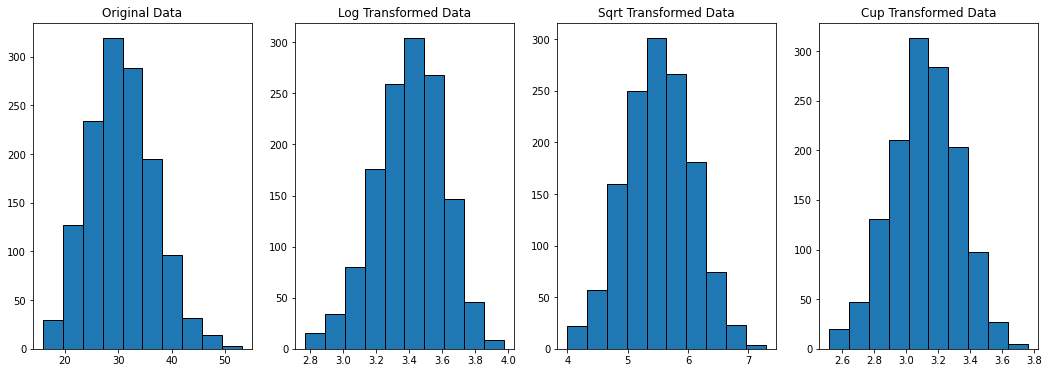

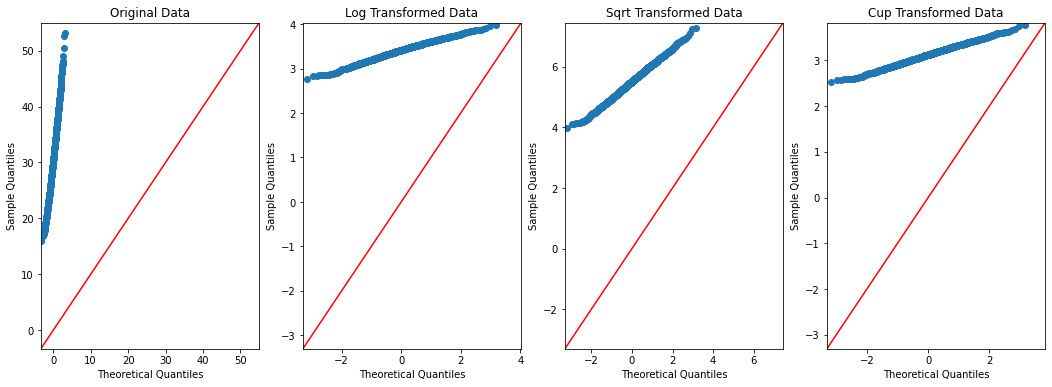

In [82]:
normalize(data['bmi'])

### Les variables qualitatives

In [83]:
def frequency_table(data, column):
    effectifs = data[column].value_counts()
    modalites = effectifs.index # l'index de effectifs contient les modalités

    tab = pd.DataFrame(modalites, columns = [column]) # création du tableau à partir des modalités
    tab["n"] = effectifs.values
    tab["f"] = tab["n"] / len(data) # len(data) renvoie la taille de l'échantillon
    tab = tab.sort_values(column) # tri des valeurs de la variable X (croissant)
    tab["F"] = tab["f"].cumsum() # cumsum calcule la somme cumulée
    display(tab)

print("-"*20 + " Frequency table " + "-"*20)
frequency_table(data, column= 'bmi_class')
frequency_table(data, column= 'region')
frequency_table(data, column= 'sex')
frequency_table(data, column= 'children')


-------------------- Frequency table --------------------


,bmi_class,n,f,F
2,normal,245,0.183109,0.183109
0,obese,707,0.528401,0.711510
1,overweight,386,0.288490,1.000000


,region,n,f,F
3,northeast,324,0.242152,0.242152
2,northwest,325,0.242900,0.485052
0,southeast,364,0.272048,0.757100
1,southwest,325,0.242900,1.000000


,sex,n,f,F
1,female,662,0.494768,0.494768
0,male,676,0.505232,1.000000


,children,n,f,F
0,0,574,0.428999,0.428999
1,1,324,0.242152,0.671151
2,2,240,0.179372,0.850523
3,3,157,0.117339,0.967862
4,4,25,0.018685,0.986547
5,5,18,0.013453,1.000000


In [84]:
pd.crosstab(index=[data['bmi_class'], data['region']], columns=data['sex'])

sex                   female  male
bmi_class  region                 
normal     northeast      44    39
           northwest      38    32
           southeast      20    21
           southwest      27    24
obese      northeast      77    66
           northwest      76    72
           southeast     103   140
           southwest      78    95
overweight northeast      40    58
           northwest      50    57
           southeast      52    28
           southwest      57    44

In [85]:
pd.crosstab(index=[data['children']], columns= data['smoker'], values=data['charges'], aggfunc=["count","mean"])

count               mean              
smoker      no  yes            no           yes
children                                       
0          459  115   7611.793335  31341.363954
1          263   61   8303.109350  31822.654334
2          185   55   9493.093674  33844.235755
3          118   39   9614.519391  32724.915268
4           22    3  12121.344408  26532.276933
5           17    1   8183.845556  19023.260000

In [86]:
pd.crosstab(index=data['sex'], columns=data['smoker'])

smoker,no,yes
sex,,
female,547,115
male,517,159


In [87]:

column_names = ['sex', 'smoker', 'region', 'bmi_class', 'children']

# Loop through all pairs of column names
for i, column1 in enumerate(column_names):
    for column2 in column_names[i+1:]:
        # Use the crosstab function to get a cross-tabulation of the two variables
        ct = pd.crosstab(index=data[column1], columns=data[column2])
        print(f'Cross-tabulation of {column1} and {column2}:')
        print(ct)
        print()

Cross-tabulation of sex and smoker:
smoker   no  yes
sex             
female  547  115
male    517  159

Cross-tabulation of sex and region:
region  northeast  northwest  southeast  southwest
sex                                               
female        161        164        175        162
male          163        161        189        163

Cross-tabulation of sex and bmi_class:
bmi_class  normal  obese  overweight
sex                                 
female        129    334         199
male          116    373         187

Cross-tabulation of sex and children:
children    0    1    2   3   4   5
sex                                
female    289  158  119  77  11   8
male      285  166  121  80  14  10

Cross-tabulation of smoker and region:
region  northeast  northwest  southeast  southwest
smoker                                            
no            257        267        273        267
yes            67         58         91         58

Cross-tabulation of smoker and bmi_clas

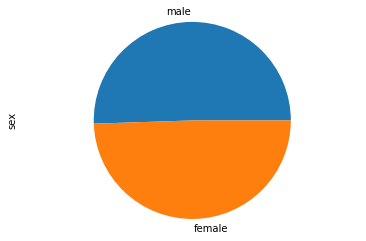

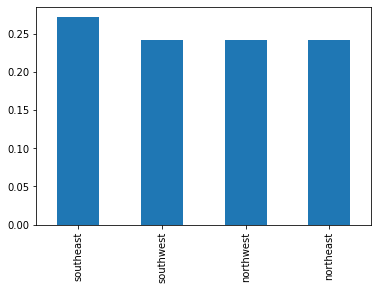

In [88]:
# Diagramme en secteurs
data["sex"].value_counts(normalize=True).plot(kind='pie')
# Cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse
plt.axis('equal') 
plt.show() # Affiche le graphique

# Diagramme en tuyaux d'orgues
data["region"].value_counts(normalize=True).plot(kind='bar')
plt.show()

# Mesures de concentration 
## sont le plus souvent utilisées pour des sommes d'argent ! Étudier la concentration d'argent, c'est regarder si l'argent est réparti de manière égalitaire ou pas.

Ce que l'on va regarder, c'est si tout l'argent que vous dépensez se concentre en quelques opérations bancaires, ou si au contraire, il est bien réparti parmi les opérations. Dire que votre argent se concentre sur quelques opérations signifie que généralement, vous faites de très nombreuses petites dépenses, et que parfois, il vous arrive de faire quelques dépenses énormes.

Au contraire, l'argent que vous dépensez est bien réparti si toutes vos opérations bancaires (sortantes) ont à peu près le même montant.

Pour visualiser cela, nous utilisons la `courbe de Lorenz`

#### l'indice de Gini
La courbe de Lorenz n'est pas une statistique, c'est une courbe ! Du coup, on a créé l'indice de Gini, qui résume la courbe de Lorenz.

Il mesure l'aire présente entre la première bissectrice et la courbe de Lorenz. Plus précisément, si on note S cette aire, alors :

gini=2 × S


L'indice de Gini est un indicateur statistique utilisé pour mesurer l'égalité dans une société ou une distribution. Plus précisément, l'indice de Gini mesure la dispersion des valeurs autour de la médiane d'une distribution, en utilisant une échelle de 0 à 1, où 0 représente une distribution parfaite de l'égalité (c'est-à-dire une situation où chaque individu dans la distribution a la même valeur) et 1 représente une distribution parfaite de l'inégalité (c'est-à-dire une situation où un seul individu dans la distribution a toutes les valeurs et tous les autres n'ont aucune valeur).

L'indice de Gini est souvent utilisé pour mesurer l'inégalité des revenus dans une économie, mais il peut également être utilisé pour mesurer l'inégalité dans d'autres domaines, tels que la distribution de la richesse, la distribution de la santé ou la distribution de l'accès à l'éducation.


On va utiliser l'indice de Gini pour mesurer l'inégalité dans la distribution des assurances. Par exemple, si vous souhaitez savoir si les personnes d'une certaine région ont un accès égal aux assurances de qualité et à des tarifs abordables, vous pouvez utiliser l'indice de Gini pour mesurer l'inégalité dans la distribution de l'accès aux assurances dans cette région. Si l'indice de Gini est élevé, cela indique qu'il y a une forte inégalité dans l'accès aux assurances dans cette région, ce qui pourrait être dû à des facteurs tels que la santé, le revenu, l'emplacement géographique ou d'autres facteurs.

Il est important de noter que l'indice de Gini ne mesure que la dispersion des valeurs autour de la médiane, il ne tient pas compte de la façon dont la distribution est répartie au-dessus ou en dessous de la médiane. Par conséquent, il peut être utile de combiner l'indice de Gini avec d'autres indicateurs pour avoir une image complète de l'inégalité dans la distribution des assurances.

gini coefiicient : 0.4631250807925965


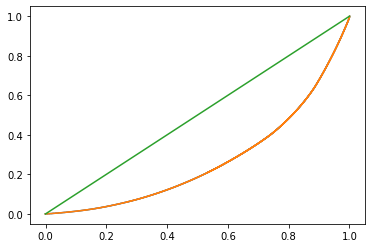

In [89]:
dep = data['charges']
n = len(dep)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post')

xaxis = np.linspace(0-1/n,1+1/n,len(lorenz)) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.plot([0,1], [0,1]) #tracer la bisséctrice

# plt.show()
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
# another methode : 
def gini(x):
    total = 0
    for i, xi in enumerate(x[:-1], 1):
        total += np.sum(np.abs(xi - x[i:]))
    return total / (len(x)**2 * np.mean(x))
print(f"gini coefiicient : {gini(dep)}")

# Correlation 

# 1- correlation entre toutes les variables quantitatives

              bmi   charges       age
bmi      1.000000  0.198341  0.109272
charges  0.198341  1.000000  0.299008
age      0.109272  0.299008  1.000000


<AxesSubplot:>

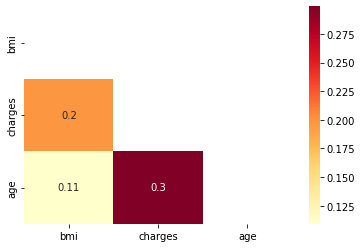

In [90]:
# Select only the numeric columns
numeric_columns = data[['bmi', 'charges','age']]
# Compute the pairwise correlations between the numeric columns
corr = numeric_columns.corr()
print(corr)


# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot the correlation matrix as a heatmap
sns.heatmap(corr, annot=True, mask=mask, cmap='YlOrRd')

In [91]:

my_functions.correlation_test(numeric_columns, 0.05)

There is a positive correlation between bmi and charges
This is a very weak correlation (r = 0.1983).
There is a statistically significant association between bmi and charges (p-value = 0.0000)

There is a positive correlation between bmi and age
This is a very weak correlation (r = 0.1093).
There is a statistically significant association between bmi and age (p-value = 0.0001)

There is a positive correlation between charges and age
This is a very weak correlation (r = 0.299).
There is a statistically significant association between charges and age (p-value = 0.0000)



## Corrélation par groupe

In [92]:
my_functions.calc_corr_pvalue(data, var1="bmi", var2="charges", group_var="smoker", alpha=0.05)




------------------------------------------------------
Correlation between bmi and charges grouped by smoker:
------------------------------------------------------


smoker  correlation      p_value
    no     0.084037 6.091409e-03
   yes     0.806481 5.019669e-64

no: There is a statistically significant association (p-value = 0.0061)
yes: There is a statistically significant association (p-value = 0.0000)


In [93]:
my_functions.calc_corr_pvalue(data, var1="bmi", var2="charges", group_var="smoker", alpha=0.05)
my_functions.calc_corr_pvalue(data, var1="bmi", var2="charges", group_var="sex", alpha=0.05)


------------------------------------------------------
Correlation between bmi and charges grouped by smoker:
------------------------------------------------------


smoker  correlation      p_value
    no     0.084037 6.091409e-03
   yes     0.806481 5.019669e-64

no: There is a statistically significant association (p-value = 0.0061)
yes: There is a statistically significant association (p-value = 0.0000)

---------------------------------------------------
Correlation between bmi and charges grouped by sex:
---------------------------------------------------


   sex  correlation      p_value
female     0.161419 3.009532e-05
  male     0.225847 2.884410e-09

female: There is a statistically significant association (p-value = 0.0000)
male: There is a statistically significant association (p-value = 0.0000)


In [94]:

my_functions.calc_corr_pvalue(data, var1="age", var2="charges", group_var="smoker", alpha=0.05)
my_functions.calc_corr_pvalue(data, var1="age", var2="charges", group_var="sex", alpha=0.05)



------------------------------------------------------
Correlation between age and charges grouped by smoker:
------------------------------------------------------


smoker  correlation       p_value
    no     0.627947 9.172018e-118
   yes     0.368224  3.180585e-10

no: There is a statistically significant association (p-value = 0.0000)
yes: There is a statistically significant association (p-value = 0.0000)

---------------------------------------------------
Correlation between age and charges grouped by sex:
---------------------------------------------------


   sex  correlation      p_value
female     0.324575 1.049599e-17
  male     0.282369 7.389879e-14

female: There is a statistically significant association (p-value = 0.0000)
male: There is a statistically significant association (p-value = 0.0000)


In [95]:
my_functions.calc_corr_pvalue(data, var1="bmi", var2="charges", group_var="bmi_class", alpha=0.05)
my_functions.calc_corr_pvalue(data, var1="age", var2="charges", group_var="bmi_class", alpha=0.05)


---------------------------------------------------------
Correlation between bmi and charges grouped by bmi_class:
---------------------------------------------------------


 bmi_class  correlation  p_value
    normal     0.177377 0.005364
     obese     0.062790 0.095266
overweight    -0.010374 0.839002

normal: There is a statistically significant association (p-value = 0.0054)
obese: There is no statistically significant association (p-value = 0.0953)
overweight: There is no statistically significant association (p-value = 0.8390)

---------------------------------------------------------
Correlation between age and charges grouped by bmi_class:
---------------------------------------------------------


 bmi_class  correlation      p_value
    normal     0.474266 3.817791e-15
     obese     0.227695 9.114357e-10
overweight     0.441022 8.415370e-20

normal: There is a statistically significant association (p-value = 0.0000)
obese: There is a statistically significant association

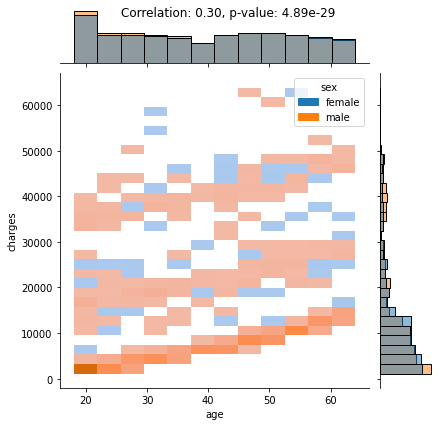

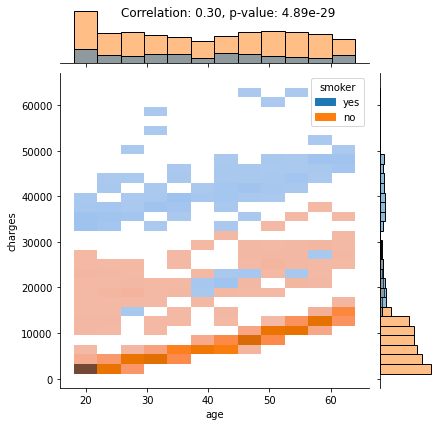

In [96]:
my_functions.make_jointplot(data, column1="age", column2="charges", hue = "sex", kind = "hist")

my_functions.make_jointplot(data, column1="age", column2="charges", hue = "smoker", kind = "hist")


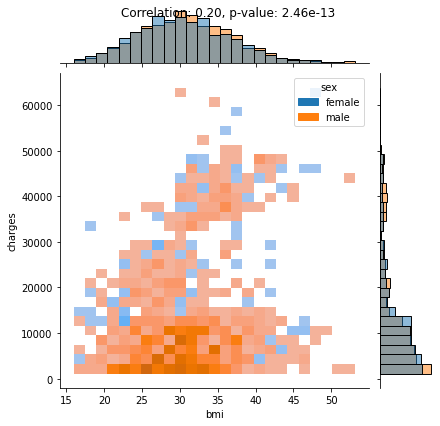

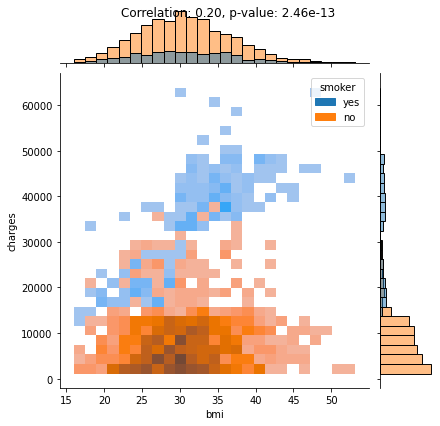

In [97]:
my_functions.make_jointplot(data, column1="bmi", column2="charges", hue = "sex", kind = "hist")

my_functions.make_jointplot(data, column1="bmi", column2="charges", hue = "smoker", kind = "hist")

# 3- Corrélation entre quantitative and binary qualitative variable
The point biserial correlation is a measure of the correlation between a dichotomous (binary) variable and a continuous variable. It is used to determine whether there is a significant relationship between the two variables. The point biserial correlation coefficient (rpb) is calculated as the difference between the means of the continuous variable for the two groups defined by the dichotomous variable, divided by the standard deviation of the continuous variable.


can calculate the point biserial correlation coefficient in Python using the pointbiserialr function from the scipy.stats module. This function takes in two arrays: one for the continuous variable and one for the dichotomous variable. The dichotomous variable should be represented as a list of 0s and 1s, where 0 represents one group and 1 represents the other group.

To test the statistical significance of the point biserial correlation coefficient, a t-test is typically used.

In [98]:
my_functions.point_biserial_correlation(data, 'charges', 'sex', alpha=0.05)
my_functions.point_biserial_correlation(data, 'charges', 'smoker', alpha=0.05)



-------------------------------------------
| Correlation between "charges" and "sex" |
-------------------------------------------
Point biserial correlation coefficient: 0.057
t-value: -2.098
p-value: 0.036
There is a significant difference in the means of the continuous variable between the two groups defined by the dichotomous variable.
----------------------------------------------
| Correlation between "charges" and "smoker" |
----------------------------------------------
Point biserial correlation coefficient: -0.787
t-value: 46.665
p-value: 0.000
There is a significant difference in the means of the continuous variable between the two groups defined by the dichotomous variable.


# 4- Corrélation entre var quantitive et var qualit avec plus que 2 catégories 
When the independent variable has more than two values, the point biserial correlation coefficient is not appropriate. Instead, you can use an analysis of variance (ANOVA) to test for differences in means of the continuous dependent variable across the levels of the independent variable.

In Python, you can use the f_oneway function from the scipy.stats module to perform a one-way ANOVA. This function takes in the data for the dependent variable as separate arrays for each level of the independent variable, and returns the F-value and p-value of the ANOVA test.

First we SHOULD examine the multivariate normality of the dependent variable.  We can check graphically either with a histogram (Analyze/Descriptive Statistics/Frequencies… and then in the menu Charts…) or with a Q-Q-Plot (Analyze/Descriptive Statistics/Q-Q-Plot…).  Both plots show a somewhat normal distribution, with a skew around the mean.

https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/one-way-anova/

https://www.pythonfordatascience.org/anova-python/


##### ANOVA AssumptionsPermalink

- Residuals (experimental error) are approximately normally distributed (Shapiro-Wilks test or histogram)

- homoscedasticity or Homogeneity of variances (variances are equal between treatment groups) (Levene’s, Bartlett’s, or Brown-Forsythe test)

- Observations are sampled independently from each other (no relation in observations between the groups and within the groups) i.e., each subject should have only one response

- The dependent variable should be continuous. If the dependent variable is ordinal or rank (e.g. Likert item data), it is more likely to violate the assumptions of normality and homogeneity of variances. If these assumptions are violated, you should consider the non-parametric tests (e.g. Mann-Whitney U test, Kruskal-Wallis test).

https://www.reneshbedre.com/blog/anova.html

------------------------------------------
| ANOVA between "charges" and "children" |
------------------------------------------
F-value: 3.297
p-value: 0.006
                sum_sq      df        F    PR(>F)
C(x)      2.396917e+09     5.0  3.29692  0.005786
Residual  1.936773e+11  1332.0      NaN       NaN

                sum_sq      df       mean_sq        F    PR(>F)    eta_sq  \
C(x)      2.396917e+09     5.0  4.793833e+08  3.29692  0.005786  0.012225   
Residual  1.936773e+11  1332.0  1.454034e+08      NaN       NaN       NaN   

          omega_sq  
C(x)       0.00851  
Residual       NaN  
The p-value of 0.006 is statistically significant at a level of 0.05.
This suggests that there is a significant differences among the independent variable "children".
But we don't know which group is different from which.
We have to do post-hoc analysis using Tukey HSD (Honest Significant Difference) Test.

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  

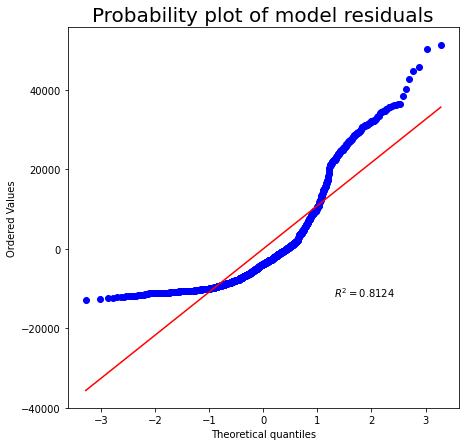


As the assumption of normality is not met,
we can use a nonparametric test that does not assume normality
such as the Kruskal-Wallis test

............. Kruskal-Wallis test
statistic : 29.4871
pvalue : 0.0
pvalue is LESS than alpha (0.05) 
No significant differences between categories


In [99]:
my_functions.one_way_anova(data, 'charges', 'children', alpha=0.05)

-------------------------------------------
| ANOVA between "charges" and "bmi_class" |
-------------------------------------------
F-value: 27.952
p-value: 0.000
                sum_sq      df          F        PR(>F)
C(x)      7.880836e+09     2.0  27.952407  1.281514e-12
Residual  1.881934e+11  1335.0        NaN           NaN

                sum_sq      df       mean_sq          F        PR(>F)  \
C(x)      7.880836e+09     2.0  3.940418e+09  27.952407  1.281514e-12   
Residual  1.881934e+11  1335.0  1.409688e+08        NaN           NaN   

            eta_sq  omega_sq  
C(x)      0.040193  0.038727  
Residual       NaN       NaN  
The p-value of 0.000 is statistically significant at a level of 0.05.
This suggests that there is a significant differences among the independent variable "bmi_class".
But we don't know which group is different from which.
We have to do post-hoc analysis using Tukey HSD (Honest Significant Difference) Test.

      Multiple Comparison of Means - Tukey HS

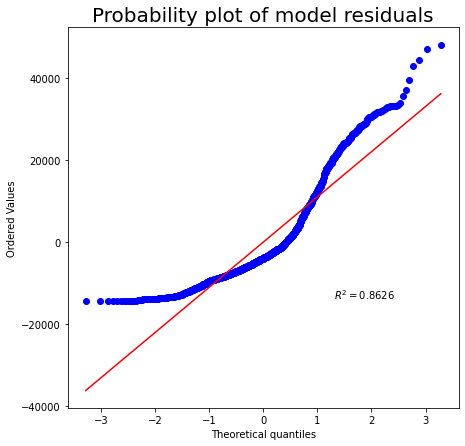


As the assumption of normality is not met,
we can use a nonparametric test that does not assume normality
such as the Kruskal-Wallis test

............. Kruskal-Wallis test
statistic : 15.8076
pvalue : 0.0004
pvalue is LESS than alpha (0.05) 
No significant differences between categories


In [100]:
my_functions.one_way_anova(data, 'charges', 'bmi_class', alpha=0.05)

----------------------------------------
| ANOVA between "charges" and "region" |
----------------------------------------
F-value: 2.970
p-value: 0.031
                sum_sq      df         F    PR(>F)
C(x)      1.300760e+09     3.0  2.969627  0.030893
Residual  1.947735e+11  1334.0       NaN       NaN

                sum_sq      df       mean_sq         F    PR(>F)    eta_sq  \
C(x)      1.300760e+09     3.0  4.335866e+08  2.969627  0.030893  0.006634   
Residual  1.947735e+11  1334.0  1.460071e+08       NaN       NaN       NaN   

          omega_sq  
C(x)      0.004397  
Residual       NaN  
The p-value of 0.031 is statistically significant at a level of 0.05.
This suggests that there is a significant differences among the independent variable "region".
But we don't know which group is different from which.
We have to do post-hoc analysis using Tukey HSD (Honest Significant Difference) Test.

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
  group1    group2   m

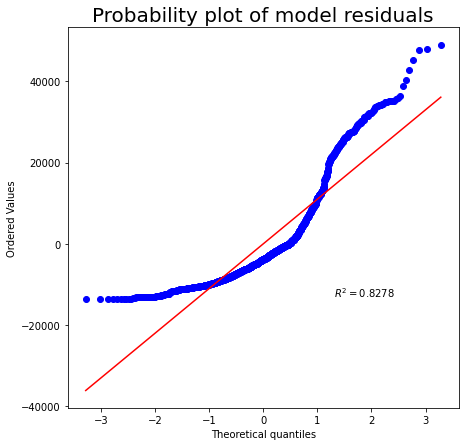


As the assumption of normality is not met,
we can use a nonparametric test that does not assume normality
such as the Kruskal-Wallis test

............. Kruskal-Wallis test
statistic : 4.7342
pvalue : 0.1923
pvalue is greater than alpha (0.05) 
This means that at least one category is significantly different from the others


In [101]:
my_functions.one_way_anova(data, 'charges', 'region', alpha=0.05)